In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv('Bitcoin.csv')
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
5,"Jul 26, 2017",2577.77,2610.76,2450.80,2529.45,"93,74,04,000","42,45,50,00,000"
6,"Jul 25, 2017",2757.50,2768.08,2480.96,2576.48,"1,46,00,90,000","45,41,01,00,000"
7,"Jul 24, 2017",2732.70,2777.26,2699.19,2754.86,"86,64,74,000","44,99,56,00,000"
8,"Jul 23, 2017",2808.10,2832.18,2653.94,2730.40,"1,07,28,40,000","46,23,11,00,000"
9,"Jul 22, 2017",2668.63,2862.42,2657.71,2810.12,"1,17,71,30,000","43,92,96,00,000"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
5,2017-07-26,2577.77,2610.76,2450.80,2529.45,"93,74,04,000","42,45,50,00,000"
6,2017-07-25,2757.50,2768.08,2480.96,2576.48,"1,46,00,90,000","45,41,01,00,000"
7,2017-07-24,2732.70,2777.26,2699.19,2754.86,"86,64,74,000","44,99,56,00,000"
8,2017-07-23,2808.10,2832.18,2653.94,2730.40,"1,07,28,40,000","46,23,11,00,000"
9,2017-07-22,2668.63,2862.42,2657.71,2810.12,"1,17,71,30,000","43,92,96,00,000"


In [5]:
df["MarketCap"] = df["MarketCap"].str.replace(",","").astype(float)

In [6]:
df['Volume'] = df['Volume'].replace('-', 0.0)

In [7]:
df["Volume"] = df["Volume"].str.replace(",","").astype(float)

In [8]:
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
5,2017-07-26,2577.77,2610.76,2450.80,2529.45,9.374040e+08,4.245500e+10
6,2017-07-25,2757.50,2768.08,2480.96,2576.48,1.460090e+09,4.541010e+10
7,2017-07-24,2732.70,2777.26,2699.19,2754.86,8.664740e+08,4.499560e+10
8,2017-07-23,2808.10,2832.18,2653.94,2730.40,1.072840e+09,4.623110e+10
9,2017-07-22,2668.63,2862.42,2657.71,2810.12,1.177130e+09,4.392960e+10


In [9]:
df['Volume'] = df['Volume'].replace(np.nan, 0.0)

In [10]:
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
5,2017-07-26,2577.77,2610.76,2450.80,2529.45,9.374040e+08,4.245500e+10
6,2017-07-25,2757.50,2768.08,2480.96,2576.48,1.460090e+09,4.541010e+10
7,2017-07-24,2732.70,2777.26,2699.19,2754.86,8.664740e+08,4.499560e+10
8,2017-07-23,2808.10,2832.18,2653.94,2730.40,1.072840e+09,4.623110e+10
9,2017-07-22,2668.63,2862.42,2657.71,2810.12,1.177130e+09,4.392960e+10


In [11]:
le = LabelEncoder()
df['Open'] = le.fit_transform(df['Open'])
df['High'] = le.fit_transform(df['High'])
df['Low'] = le.fit_transform(df['Low'])
df['Close'] = le.fit_transform(df['Close'])
df['Volume'] = le.fit_transform(df['Volume'])
df['MarketCap'] = le.fit_transform(df['MarketCap'])


In [12]:
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,2017-07-31,1520,1518,1535,1526,1241,1543
1,2017-07-30,1516,1503,1523,1519,1227,1539
2,2017-07-29,1521,1512,1531,1514,1237,1546
3,2017-07-28,1508,1519,1529,1521,1286,1534
4,2017-07-27,1491,1500,1513,1508,1235,1517
5,2017-07-26,1499,1489,1499,1491,1248,1522
6,2017-07-25,1519,1507,1503,1498,1289,1542
7,2017-07-24,1517,1509,1532,1518,1242,1541
8,2017-07-23,1523,1514,1525,1515,1261,1545
9,2017-07-22,1507,1516,1526,1522,1271,1530


In [13]:
y = np.array(df['MarketCap'])
y

array([1543, 1539, 1546, ...,  164,  131,  136], dtype=int64)

In [14]:
df['Date'] = le.fit_transform(df['Date'])

In [15]:
df

,Date,Open,High,Low,Close,Volume,MarketCap
0,1555,1520,1518,1535,1526,1241,1543
1,1554,1516,1503,1523,1519,1227,1539
2,1553,1521,1512,1531,1514,1237,1546
3,1552,1508,1519,1529,1521,1286,1534
4,1551,1491,1500,1513,1508,1235,1517
5,1550,1499,1489,1499,1491,1248,1522
6,1549,1519,1507,1503,1498,1289,1542
7,1548,1517,1509,1532,1518,1242,1541
8,1547,1523,1514,1525,1515,1261,1545
9,1546,1507,1516,1526,1522,1271,1530


In [16]:
X = df.iloc[ : ,df.columns != 'MarketCap']

In [17]:
X

,Date,Open,High,Low,Close,Volume
0,1555,1520,1518,1535,1526,1241
1,1554,1516,1503,1523,1519,1227
2,1553,1521,1512,1531,1514,1237
3,1552,1508,1519,1529,1521,1286
4,1551,1491,1500,1513,1508,1235
5,1550,1499,1489,1499,1491,1248
6,1549,1519,1507,1503,1498,1289
7,1548,1517,1509,1532,1518,1242
8,1547,1523,1514,1525,1515,1261
9,1546,1507,1516,1526,1522,1271


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
len(X_train)

1089

In [20]:
len(X_test)

467

In [21]:
# Standard scaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [22]:
# Ridge Regression

regRidge = Ridge()
regRidge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
regRidge.score(X_test, y_test)

0.9927838654286302

In [24]:
regRidge.predict([[1555, 1520,	1518, 1535,	1526, 1241]])

array([707458.72728534])

In [25]:
# Linear Regression

reglr = LinearRegression()
reglr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reglr.score(X_test, y_test)

0.9927038484919911

In [27]:
reglr.predict([[1555, 1520,	1518, 1535,	1526, 1241]])

array([706035.8945932])

In [28]:
y_predicted = regRidge.predict(X_test)
y_predicted

array([ 1.05448068e+03,  3.67996746e+02,  1.04129863e+03,  1.30237959e+02,
        3.36755030e+02,  6.07363049e+02,  1.55570446e+03,  1.17504863e+03,
        1.29416067e+03,  3.59247030e+02,  1.23707345e+03,  9.77888061e+02,
       -1.31565957e+01,  1.47026008e+03,  4.62952171e+02,  1.26447191e+03,
        1.54561637e+03,  1.38893293e+03,  1.07067441e+03, -8.82600717e+00,
        8.42766875e+02,  1.55409368e+03,  5.73150146e+02,  6.38648826e+02,
        1.48995571e+03,  8.21459745e+02,  1.00088055e+03,  3.19470723e+02,
        5.72173599e+02,  1.50368891e+02,  1.27070515e+03,  7.10562046e+01,
        2.97126460e+01,  2.51903449e+02,  9.69238531e+02,  3.47703530e+02,
        1.22594411e+03,  1.50960164e+03,  3.90181445e+02,  1.19315697e+03,
        5.81908268e+02,  1.47567741e+03,  4.08225517e+02,  2.76890210e+02,
        1.22122561e+03,  4.76772813e+02,  1.56792569e+02,  1.20627552e+03,
        9.59820965e+02,  1.31421428e+03,  1.48984610e+03,  6.61670991e+02,
        2.64135033e+02,  

In [29]:
from matplotlib.pyplot import figure

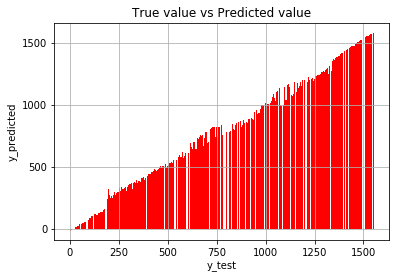

<Figure size 1200x800 with 0 Axes>

In [30]:
plt.bar(y_test, y_predicted, width = 5, color = 'red')

plt.xlabel('y_test')
plt.ylabel('y_predicted')

plt.title('True value vs Predicted value')

plt.grid(True)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.style.use('fivethirtyeight')

In [31]:
# cross_val_score
cross_val_score(Ridge(), X, y, cv = 2)

array([0.93121574, 0.95838084])